# WeatherPy
----

#### Observable Trends

* The correlation between latitude and max temperature is high in the northern hemisphere (a correlation coefficient of -0.89) and moderately correlated in the southern hemisphere (correlation coefficient of 0.64).  In both hemispheres, the temperature does trend warmer when closer to the equator.

* There is low correlation between latitude and humidity, and latitude and wind speed.  This is true for both northern and southern hemispheres, from observing the correlation coefficients.  Looking at the overall charts, the humidity is trending high and wind speeds are trending low.

* Cloudiness appears to be somewhat evenly distributed between no clouds and 100% clouds, regardless of latitude.  The correlation coefficients for both northern and southern hemispheres are very low, suggesting that latitude and cloudiness are not related.

In [156]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
from api_keys import weather_api_key
from citipy import citipy
import random
import json
import time
import scipy.stats as st
from scipy.stats import linregress
import datetime

### Generate Cities List

In [106]:
# create random list of coordinates

latitude_list = []
longitude_list = []
desired_length = 500

for i in range(0,desired_length*4):
    n = random.uniform(-90, 90)
    latitude_list.append(n)

for j in range(0,desired_length*4):
    n = random.uniform(-180, 180)
    longitude_list.append(n)


In [107]:
# create list of unique cities from the coordinates

city_list = []

for lat, lng in zip(latitude_list, longitude_list):
    city = citipy.nearest_city(lat, lng).city_name
    if city not in city_list:
        city_list.append(city)

print(len(city_list))

#url = "http://api.openweathermap.org/data/2.5/weather?"
#units = "imperial"
#city = "marawi"
#query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
#weather_response = requests.get(query_url)
#weather_json = weather_response.json()
#print(json.dumps(weather_json, indent=4))


765


### Perform API Calls

In [110]:
# create lists to hold data

city_id_list = []
cityname_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_list = []
city_id = 0

# save info for api

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# loop through each city and pull info

for city in city_list:
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    if weather_json["cod"] == 200:
        city_id_list.append(city_id)
        cityname_list.append(city)
        cloudiness_list.append(weather_json["clouds"]["all"])
        country_list.append(weather_json["sys"]["country"])
        date_list.append(weather_json["dt"])
        humidity_list.append(weather_json["main"]["humidity"])
        lat_list.append(weather_json["coord"]["lat"])
        lng_list.append(weather_json["coord"]["lon"])
        max_temp_list.append(weather_json["main"]["temp_max"])
        wind_list.append(weather_json["wind"]["speed"])
        print(f"City ID: {city_id}, City Name: {city}")
        city_id += 1
    time.sleep(2)

City ID: 0, City Name: saumur
City ID: 1, City Name: hualmay
City ID: 2, City Name: hobart
City ID: 3, City Name: esperance
City ID: 4, City Name: praia
City ID: 5, City Name: shirvan
City ID: 6, City Name: busselton
City ID: 7, City Name: cape town
City ID: 8, City Name: barrow
City ID: 9, City Name: portland
City ID: 10, City Name: inhambane
City ID: 11, City Name: pangnirtung
City ID: 12, City Name: bilma
City ID: 13, City Name: rikitea
City ID: 14, City Name: ushuaia
City ID: 15, City Name: khatanga
City ID: 16, City Name: riberalta
City ID: 17, City Name: toropets
City ID: 18, City Name: vaini
City ID: 19, City Name: bilibino
City ID: 20, City Name: klaksvik
City ID: 21, City Name: rock springs
City ID: 22, City Name: puerto ayora
City ID: 23, City Name: mudon
City ID: 24, City Name: kaitangata
City ID: 25, City Name: killybegs
City ID: 26, City Name: eydhafushi
City ID: 27, City Name: hermanus
City ID: 28, City Name: kiama
City ID: 29, City Name: kuningan
City ID: 30, City Name: 

City ID: 242, City Name: severo-kurilsk
City ID: 243, City Name: east london
City ID: 244, City Name: kipini
City ID: 245, City Name: wilson
City ID: 246, City Name: jawhar
City ID: 247, City Name: tiksi
City ID: 248, City Name: atuona
City ID: 249, City Name: te anau
City ID: 250, City Name: port elizabeth
City ID: 251, City Name: kiunga
City ID: 252, City Name: puro
City ID: 253, City Name: udachnyy
City ID: 254, City Name: yumen
City ID: 255, City Name: isangel
City ID: 256, City Name: wellington
City ID: 257, City Name: brenham
City ID: 258, City Name: sulangan
City ID: 259, City Name: kashi
City ID: 260, City Name: sorong
City ID: 261, City Name: dingle
City ID: 262, City Name: lingdong
City ID: 263, City Name: korla
City ID: 264, City Name: lufilufi
City ID: 265, City Name: zemio
City ID: 266, City Name: chuy
City ID: 267, City Name: butterworth
City ID: 268, City Name: nanyuki
City ID: 269, City Name: pouembout
City ID: 270, City Name: mantua
City ID: 271, City Name: creel
City 

City ID: 481, City Name: ostrovnoy
City ID: 482, City Name: nouadhibou
City ID: 483, City Name: betare oya
City ID: 484, City Name: rio muerto
City ID: 485, City Name: xinye
City ID: 486, City Name: havre-saint-pierre
City ID: 487, City Name: rio bonito
City ID: 488, City Name: vylkove
City ID: 489, City Name: trapani
City ID: 490, City Name: praia da vitoria
City ID: 491, City Name: burns lake
City ID: 492, City Name: kavaratti
City ID: 493, City Name: port keats
City ID: 494, City Name: manchester
City ID: 495, City Name: makakilo city
City ID: 496, City Name: luderitz
City ID: 497, City Name: robertson
City ID: 498, City Name: barra dos coqueiros
City ID: 499, City Name: san vicente de chucuri
City ID: 500, City Name: campbellton
City ID: 501, City Name: mazagao
City ID: 502, City Name: lorengau
City ID: 503, City Name: brazzaville
City ID: 504, City Name: faanui
City ID: 505, City Name: ratnagiri
City ID: 506, City Name: bulgan
City ID: 507, City Name: portage
City ID: 508, City Na

### Convert Raw Data to DataFrame

In [111]:
# create data frame

weather_dict = {
    "City ID": city_id_list,
    "City": cityname_list,
    "Cloudiness": cloudiness_list,
    "Country": country_list,
    "Date": date_list,
    "Humidity": humidity_list,
    "Lat": lat_list,
    "Lng": lng_list,
    "Max Temp": max_temp_list,
    "Wind Speed": wind_list
}
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,City ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,saumur,100,FR,1602986173,93,47.33,-0.25,46.99,5.59
1,1,hualmay,13,PE,1602986175,85,-11.10,-77.61,62.37,8.93
2,2,hobart,75,AU,1602986102,54,-42.88,147.33,61.00,6.93
3,3,esperance,0,AU,1602986179,67,-33.87,121.90,60.80,11.41
4,4,praia,20,CV,1602986181,94,14.92,-23.51,77.00,4.70


In [112]:
#save data frame to csv file

weather_df.to_csv("output/city_data.csv", encoding="utf-8", index=False)

### Inspect the data and remove the cities where the humidity > 100%.

In [129]:
# find out if any cities have humidity over 100%

high_humidity_count = len(weather_df[weather_df["Humidity"] > 100])
print(f"Number of cities in list with humidity over 100%: {high_humidity_count}")

Number of cities in list with humidity over 100%: 0


In [130]:
#  Get the indices of cities that have humidity over 100% and drop them from the dataframe

if high_humidity_count > 0:
    index = weather_df[weather_df["Humidity"] > 100].index
    weather_df = weather_df.drop(index)

## Plotting the Data

## Latitude vs. Temperature Plot

* This chart is plotting the max temperature for each city on the day specified and how it relates to the latitude of the city.  
* The temperatures do appear to get higher the closer the latitude is to the equator.

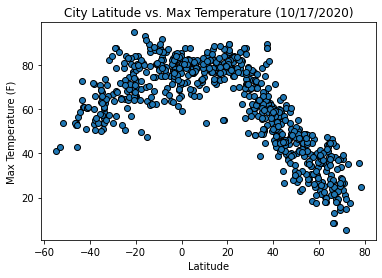

In [162]:
# get date the weather data was pulled from api
timestamp = datetime.datetime.fromtimestamp(weather_df["Date"][0])
date = timestamp.strftime("%m/%d/%Y")

# put latutide data in a list
lat_data = weather_df["Lat"]

# create first plot
max_temp_data = weather_df["Max Temp"]

plt.scatter(lat_data, max_temp_data, marker="o", edgecolors="black")
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("output/plot1.png")
plt.show()

## Latitude vs. Humidity Plot
* This chart is plotting the humidity for each city on the day specified and how it relates to the latitude of the city.
* There appears to be more cities with a higher humidity than low.  
* There isn't an observable trend between humidity and latitude.  

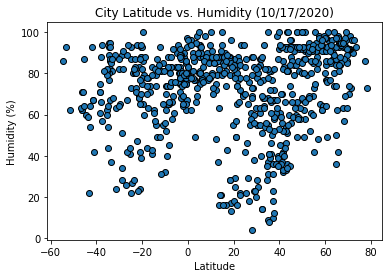

In [174]:
humidity_data = weather_df["Humidity"]

plt.scatter(lat_data, humidity_data, marker="o", edgecolors="black")
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output/plot2.png")
plt.show()

## Latitude vs. Cloudiness Plot
* This chart is plotting the cloudiness for each city on the day specified and how it relates to the latitude of the city.
* There appears to be cities with high cloudiness, low cloudiness, and everything in between.  
* There isn't an observable trend between cloudiness and latitude.  

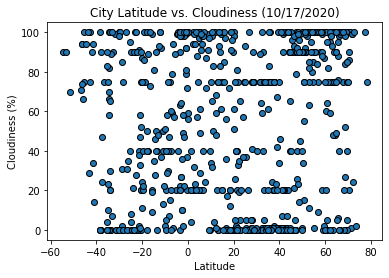

In [175]:
cloudiness_data = weather_df["Cloudiness"]

plt.scatter(lat_data, cloudiness_data, marker="o", edgecolors="black")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output/plot3.png")
plt.show()

## Latitude vs. Wind Speed Plot
* This chart is plotting the wind speed for each city on the day specified and how it relates to the latitude of the city.
* There appears to be more cities with a lower wind speed than high.  
* There isn't an observable trend between wind speed and latitude.  

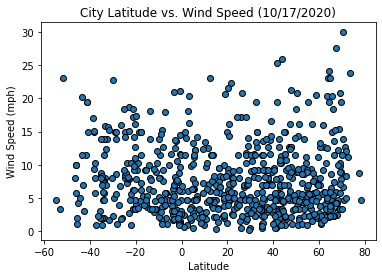

In [176]:
wind_data = weather_df["Wind Speed"]

plt.scatter(lat_data, wind_data, marker="o", edgecolors="black")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output/plot4.png")
plt.show()

## Linear Regression

In [177]:
# create dataframes for northern & southern hemisperes

north_df = weather_df.loc[weather_df["Lat"] >= 0]
north_lat = north_df["Lat"]

south_df = weather_df.loc[weather_df["Lat"] < 0]
south_lat = south_df["Lat"]

## Max Temp vs. Latitude Linear Regression
* In the northern hemisphere, max temperature and latitude are highly correlatated.
* In the southern hemisphere, max temperature and latitude are moderatly correlatated.
* The hemispheres have opposite signs for their correlation coefficients, because the temperatures trend warmer as the latitude approaches zero (the equator) for both hemispheres.

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

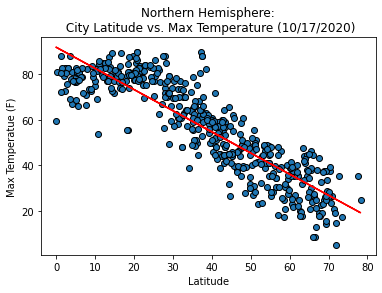

Linear Regression Model: y = -0.92x + 91.68
The correlation coefficient is -0.89


In [178]:
max_temp_n = north_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, max_temp_n)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(north_lat, max_temp_n, marker="o", edgecolors="black")
plt.plot(north_lat,regress_values,"r-")
plt.title(f"Northern Hemisphere:\n City Latitude vs. Max Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperatue (F)")
plt.savefig("output/plot5.png")
plt.show()

correlation = st.pearsonr(north_lat, max_temp_n)
print(f"Linear Regression Model: {line_eq}")
print(f"The correlation coefficient is {round(correlation[0],2)}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

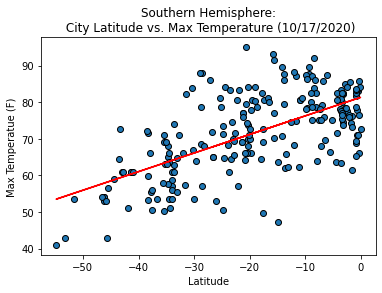

Linear Regression Model: y = 0.51x + 81.35
The correlation coefficient is 0.64


In [179]:
max_temp_s = south_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, max_temp_s)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(south_lat, max_temp_s, marker="o", edgecolors="black")
plt.plot(south_lat,regress_values,"r-")
plt.title(f"Southern Hemisphere:\n City Latitude vs. Max Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperatue (F)")
plt.savefig("output/plot6.png")
plt.show()

correlation = st.pearsonr(south_lat, max_temp_s)
print(f"Linear Regression Model: {line_eq}")
print(f"The correlation coefficient is {round(correlation[0],2)}")

## Humidity vs. Latitude Linear Regression
* In both northern and southern hemispheres, humidity and latitude have a low correlation.
* It appears more cities have a higher humidity than low.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

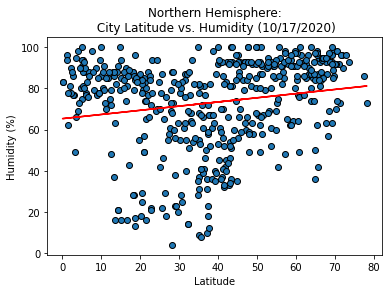

Linear Regression Model: y = 0.2x + 65.33
The correlation coefficient is 0.18


In [180]:
humidity_n = north_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, humidity_n)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(north_lat, humidity_n, marker="o", edgecolors="black")
plt.plot(north_lat,regress_values,"r-")
plt.title(f"Northern Hemisphere:\n City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output/plot7.png")
plt.show()

correlation = st.pearsonr(north_lat, humidity_n)
print(f"Linear Regression Model: {line_eq}")
print(f"The correlation coefficient is {round(correlation[0],2)}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

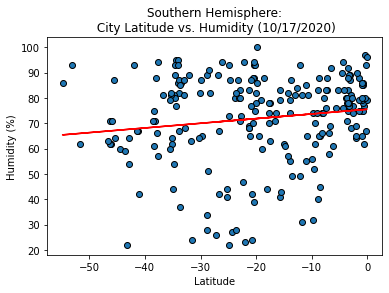

Linear Regression Model: y = 0.18x + 75.52
The correlation coefficient is 0.15


In [181]:
humidity_s = south_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, humidity_s)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(south_lat, humidity_s, marker="o", edgecolors="black")
plt.plot(south_lat,regress_values,"r-")
plt.title(f"Southern Hemisphere:\n City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output/plot8.png")
plt.show()

correlation = st.pearsonr(south_lat, humidity_s)
print(f"Linear Regression Model: {line_eq}")
print(f"The correlation coefficient is {round(correlation[0],2)}")

## Cloudiness vs. Latitude Linear Regression
* In both northern and southern hemispheres, cloudiness and latitude have a low correlation.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

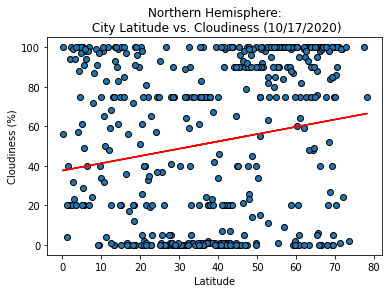

Linear Regression Model: y = 0.37x + 37.62
The correlation coefficient is 0.18


In [182]:
cloudiness_n = north_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, cloudiness_n)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(north_lat, cloudiness_n, marker="o", edgecolors="black")
plt.plot(north_lat,regress_values,"r-")
plt.title(f"Northern Hemisphere:\n City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output/plot9.png")
plt.show()

correlation = st.pearsonr(north_lat, cloudiness_n)
print(f"Linear Regression Model: {line_eq}")
print(f"The correlation coefficient is {round(correlation[0],2)}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

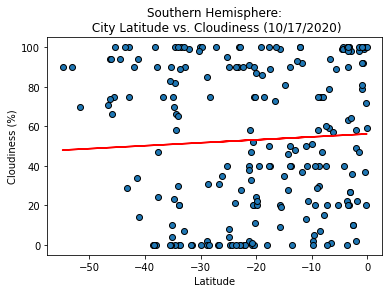

Linear Regression Model: y = 0.15x + 56.15
The correlation coefficient is 0.06


In [183]:
cloudiness_s = south_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, cloudiness_s)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(south_lat, cloudiness_s, marker="o", edgecolors="black")
plt.plot(south_lat,regress_values,"r-")
plt.title(f"Southern Hemisphere:\n City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output/plot10.png")
plt.show()

correlation = st.pearsonr(south_lat, cloudiness_s)
print(f"Linear Regression Model: {line_eq}")
print(f"The correlation coefficient is {round(correlation[0],2)}")

## Wind Speed vs. Latitude Linear Regression
* In both northern and southern hemispheres, wind speed and latitude have a low correlation.
* It appears more cities have a lower wind speed than high.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

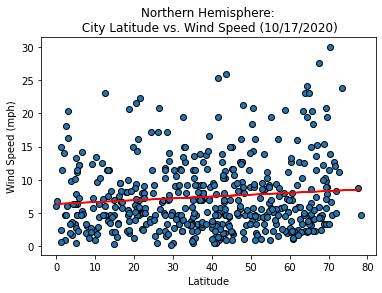

Linear Regression Model: y = 0.03x + 6.37
The correlation coefficient is 0.1


In [184]:
wind_n = north_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, wind_n)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(north_lat, wind_n, marker="o", edgecolors="black")
plt.plot(north_lat,regress_values,"r-")
plt.title(f"Northern Hemisphere:\n City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output/plot11.png")
plt.show()

correlation = st.pearsonr(north_lat, wind_n)
print(f"Linear Regression Model: {line_eq}")
print(f"The correlation coefficient is {round(correlation[0],2)}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

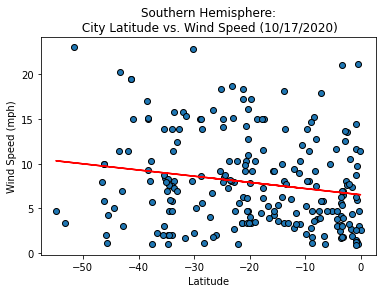

Linear Regression Model: y = -0.07x + 6.53
The correlation coefficient is -0.19


In [185]:
wind_s = south_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, wind_s)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(south_lat, wind_s, marker="o", edgecolors="black")
plt.plot(south_lat,regress_values,"r-")
plt.title(f"Southern Hemisphere:\n City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output/plot12.png")
plt.show()

correlation = st.pearsonr(south_lat, wind_s)
print(f"Linear Regression Model: {line_eq}")
print(f"The correlation coefficient is {round(correlation[0],2)}")